#                                                           Classification| K-Nearest Neighbors 

#### Numpy, Pandas, Matplotlib, Python
Implemented data visualization and calculated several distance
metrics on biomedical dataset. Best result was obtained by Euclidean distance

##### Import needed libraries

In [215]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.neighbors import DistanceMetric
from sklearn.datasets import make_classification



### Data Source: https://archive.ics.uciedu/ml/datasets/Vertebral+Column. 

Below code reads data from column_2c.dat file to a dataframe.
Sample output view of the dataframe is printed.

In [216]:
## fetching the data from column_2C.dat file into a dataframe "df"
df = pd.read_csv('column_2C.dat',sep=',',header=None,index_col=None)
print("\033[1m")
print("\n \033[1m Sample view of first 5 rows of the data imported into the dataframe : \033[0m \n   " )
print("\033[0m")
print(df.head())
print ("length of the dataset: " )
print(len(df))



  Sample view of first 5 rows of the data imported into the dataframe :  
   

       0      1      2      3       4      5   6
0  63.03  22.55  39.61  40.48   98.67  -0.25  AB
1  39.06  10.06  25.02  29.00  114.41   4.56  AB
2  68.83  22.22  50.09  46.61  105.99  -3.53  AB
3  69.30  24.65  44.31  44.64  101.87  11.21  AB
4  49.71   9.65  28.32  40.06  108.17   7.92  AB
length of the dataset: 
310


#### Scatterplots of the independent variables in the dataset

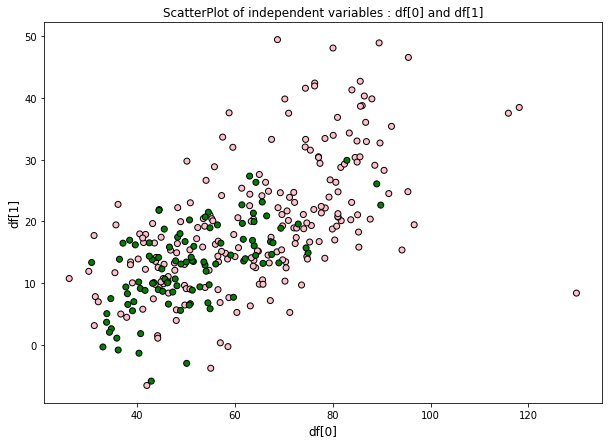

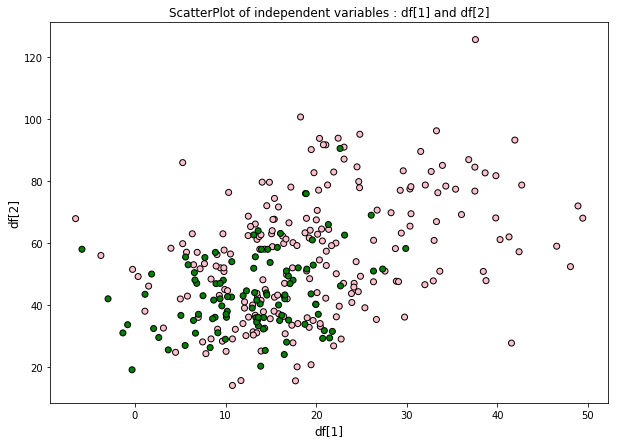

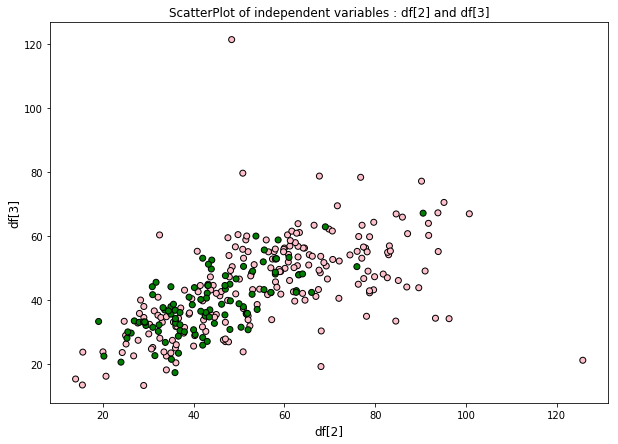

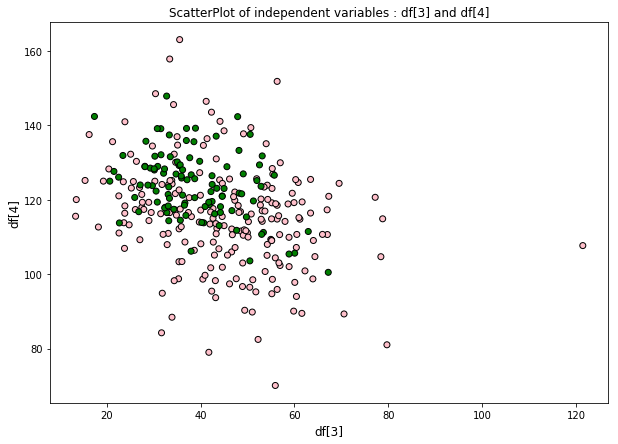

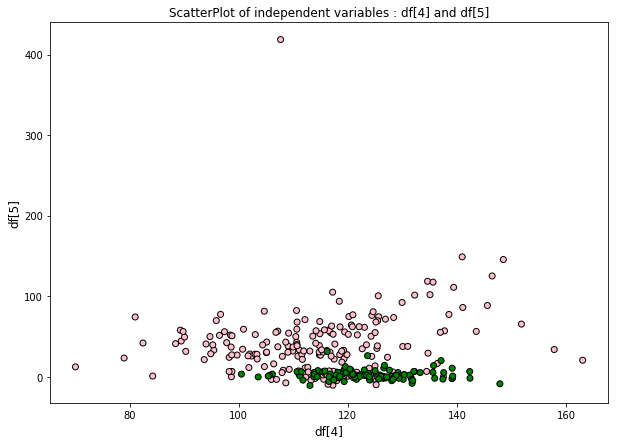

In [217]:

df.replace('AB',1,inplace=True)
df.replace('NO',0,inplace=True)
color=np.where(df[6] == 1,'pink','green')
for i in range(0,5,1):
    
    plt.figure(figsize=(10,7))
    plt.scatter(df[i],df[i+1],c=color,marker='o',edgecolors='black')
    plt.title('ScatterPlot of independent variables : df[{}] and df[{}]' .format(i,i+1))
    plt.xlabel('df[{}]'.format(i),fontsize=12)
    plt.ylabel('df[{}]'.format(i+1),fontsize=12)
    plt.show()



#### Boxplots for each of the independent variables. Use color to show Classes 0 and 1

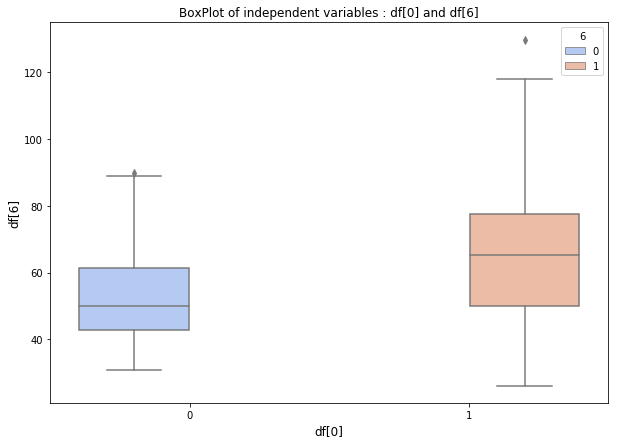

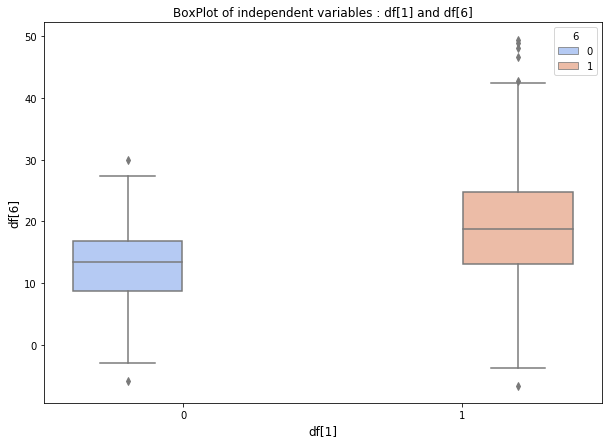

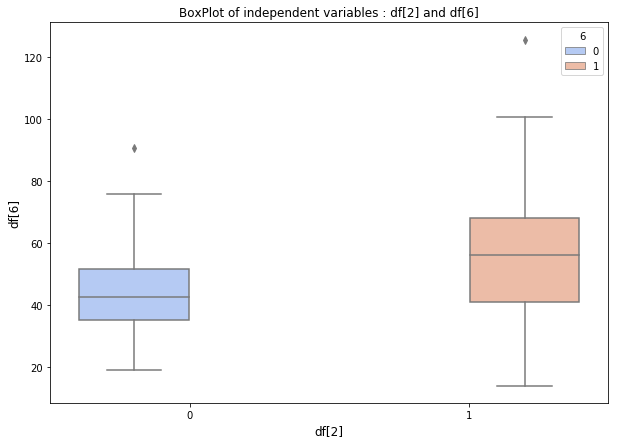

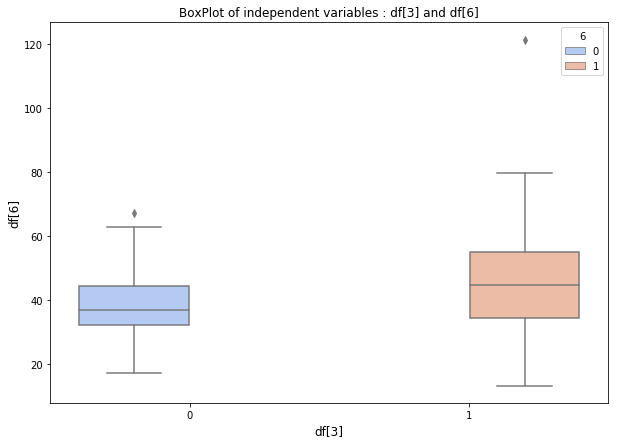

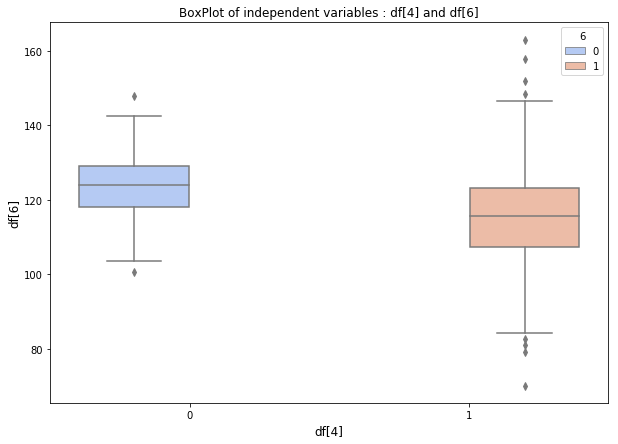

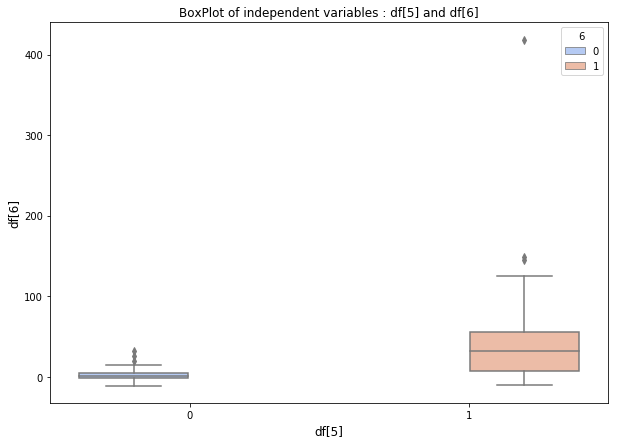

In [218]:
#sns.set(style="whitegrid")
#df_box = sns.load_dataset("df")


df.replace('AB',1,inplace=True)
df.replace('NO',0,inplace=True)
#color=np.where(df[6] == 1,'red','blue')
for i in range(0,6,1):
    
    plt.figure(figsize=(10,7))
    sns.boxplot(x=df[6],y=df[i],hue=df[6],palette="coolwarm")
    plt.title('BoxPlot of independent variables : df[{}] and df[{}]' .format(i,6))
    plt.xlabel('df[{}]'.format(i),fontsize=12)
    plt.ylabel('df[{}]'.format(6),fontsize=12)
    plt.show()




#### Training set and the rest of the data as the test set.

In [219]:
AB = pd.DataFrame(df.loc[df[6]==1])
                 
NO = pd.DataFrame(df.loc[df[6]==0])

In [220]:
X_train = AB[:140].append(NO[:70])
X_train = X_train.drop([6],axis=1)
X_test =  AB[140:].append(NO[70:])
X_test = X_test.drop([6],axis=1)
y_train =  AB[:140].append(NO[:70])
y_train = y_train.drop([0,1,2,3,4,5],axis=1)
y_test =  AB[140:].append(NO[70:])
y_test = y_test.drop([0,1,2,3,4,5],axis=1)
#y_test

#### k-nearest neighbors with Euclidean metric (or use a software package).


###### KNN outcome with Euclidean distance and neighbors weighted by majority polling, tested on test data
By applying K-Nearest Neighbors classifier algorithm(neighbors Weighed by Majority Polling),using test data to test the outcome, best error rate of 0.06 is obtained with 4 neighbors.

In [221]:
#Test Error
error_rate = []
k_test = []
pred_test = []
#error_k_array = []
accuracy = []
best_error_euc = 10000
for i in range(208,0,-3):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train.values.ravel())
    pred_i = knn.predict(X_test)
    pred_test.append(pred_i)
    error_rate.append(np.mean(pred_i != y_test.values.ravel()))
    k_test.append(i)
    accuracy.append(accuracy_score(y_test,pred_i))
    if  best_error_euc >  min(error_rate) :
        best_error_euc = min(error_rate)
        best_k_euc = i
print("\033[1m") 
print("KNN outcome with Euclidean distance and neighbors weighted by majority polling, tested on test data:\n")
print("\033[0m")
print ("Best error rate = {}". format(best_error_euc))
print ("Number of neighbors = {}". format(best_k_euc))



KNN outcome with Euclidean distance and neighbors weighted by majority polling, tested on test data:


Best error rate = 0.06
Number of neighbors = 4


##### Euclidean Distance Metric (weighed by majority polling, tested on test data):

##### Computation of Confusion Matrix, Classification Report, True Positive rate, True Negative rate, Precision and F-score:


In [222]:
knn = KNeighborsClassifier(n_neighbors= 4 , p=2)
knn.fit(X_train,y_train.values.ravel())
pred_i = knn.predict(X_test)

print("\033[1m") 
print ("Euclidean Distance Metric (weighed by majority polling, tested on test data):\n===============================================================================")
print("\033[0m")
print ("\nConfusion Matrix:\n=========================")
print(confusion_matrix(y_test,pred_i))
print ("\nClassification Report:\n==========================")
print(classification_report(y_test,pred_i))

cm = confusion_matrix(y_test,pred_i)
print('True positive = ', cm[0][0])
print('False positive = ', cm[0][1])
print('False negative = ', cm[1][0])
print('True negative = ', cm[1][1])
print('True negative rate = ', (cm[1][1])/(cm[1][1]+cm[0][1]))
print('True positive rate = ', (cm[0][0])/(cm[0][0]+cm[1][0]))
print('Precision = ', (cm[0][0])/(cm[0][0]+cm[0][1]))
print('F1 Score = ', (cm[0][0]+cm[0][0])/(cm[0][0]+cm[0][0]+cm[0][1]+cm[1][0]))


Euclidean Distance Metric (weighed by majority polling, tested on test data):


Confusion Matrix:
[[25  5]
 [ 1 69]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.93      0.99      0.96        70

   micro avg       0.94      0.94      0.94       100
   macro avg       0.95      0.91      0.93       100
weighted avg       0.94      0.94      0.94       100

True positive =  25
False positive =  5
False negative =  1
True negative =  69
True negative rate =  0.9324324324324325
True positive rate =  0.9615384615384616
Precision =  0.8333333333333334
F1 Score =  0.8928571428571429


##### Graph shows the error rate plotted against k values.

Text(0, 0.5, 'Error Rate')

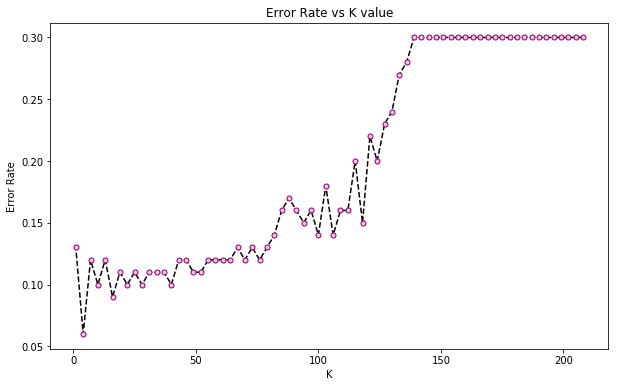

In [223]:
plt.figure(figsize=(10,6))
plt.plot(range(208,0,-3),error_rate,color='black',linestyle='dashed',marker='o',
         markerfacecolor='pink',markeredgecolor='purple',markersize=5)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

##### KNN outcome with Euclidean distance and neighbors weighted by majority polling, tested on training data:
By applying K-Nearest Neighbors classifier algorithm(neighbors Weighed by Majority Polling),using test data to test the outcome, best error rate of 0.0 is obtained with 1 neighbors.

In [192]:
#Training Error
train_error_rate = []
#accuracy = []
k_train = []
best_error_euc_train  = 10000
for i in range(208,0,-3):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train.values.ravel())
    pred_i = knn.predict(X_train)
    train_error_rate.append(np.mean(pred_i != y_train.values.ravel()))
    #print ("Accuracy is ", accuracy_score(y_train,pred_i)*100,"% for K-Value:",i)
    #accuracy.append(accuracy_score(y_train,pred_i))
    k_train.append(i)
    if  best_error_euc_train >  min(train_error_rate) :
        best_error_euc_train = min(train_error_rate)
        best_k_euc_train = i
        #best_accuracy_mah = accuracy_score(y_test,pred_i_mah)
        #print ("best_error_mah {} \n".format(best_error_mah))

print("\033[1m")
print("KNN outcome with Euclidean distance and neighbors weighted by majority polling, tested on training data:\n")
print("\033[0m")
print ("Best error rate = {}". format(best_error_euc_train))
print ("Number of neighbors = {}". format(best_k_euc_train))




KNN outcome with Euclidean distance and neighbors weighted by majority polling, tested on training data:


Best error rate = 0.0
Number of neighbors = 1


##### Euclidean Distance Metric (weighed by majority polling, tested on training data):  
##### Computation of Confusion Matrix, Classification Report, True Positive rate, True Negative rate, Precision and F-score:


In [193]:
knn = KNeighborsClassifier(n_neighbors= 1 , p=2)
knn.fit(X_train,y_train.values.ravel())
pred_t = knn.predict(X_train)

print("\033[1m")
print ("Euclidean Distance Metric (weighed by majority polling, tested on train data):\n===============================================================================")
print("\033[0m")
print ("\nConfusion Matrix:\n=========================")
print(confusion_matrix(y_train,pred_t))
print ("\nClassification Report:\n==========================")
print(classification_report(y_train,pred_t))



cm_1 = confusion_matrix(y_train,pred_t)
print('True positive = ', cm_1[0][0])
print('False positive = ', cm_1[0][1])
print('False negative = ', cm_1[1][0])
print('True negative = ', cm_1[1][1])
print('True negative rate = ', (cm_1[1][1])/(cm_1[1][1]+cm_1[0][1]))
print('True positive rate = ', (cm_1[0][0])/(cm_1[0][0]+cm_1[1][0]))
print('Precision = ', (cm_1[0][0])/(cm_1[0][0]+cm_1[0][1]))
print('F1 Score = ', (cm_1[0][0]+cm_1[0][0])/(cm_1[0][0]+cm_1[0][0]+cm_1[0][1]+cm_1[1][0]))


Euclidean Distance Metric (weighed by majority polling, tested on train data):


Confusion Matrix:
[[ 70   0]
 [  0 140]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00       140

   micro avg       1.00      1.00      1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210

True positive =  70
False positive =  0
False negative =  0
True negative =  140
True negative rate =  1.0
True positive rate =  1.0
Precision =  1.0
F1 Score =  1.0


##### Graph shows the error rate plotted against k values.

Text(0, 0.5, 'Error Rate')

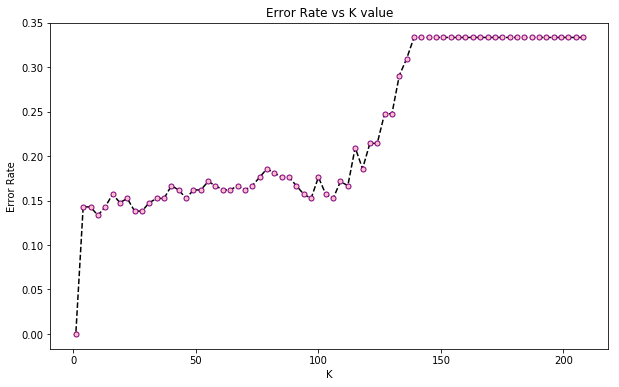

In [194]:
plt.figure(figsize=(10,6))
plt.plot(range(208,0,-3),train_error_rate,color='black',linestyle='dashed',marker='o',
         markerfacecolor='pink',markeredgecolor='purple',markersize=5)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

By applying the learning curve based approach, best error rate of 0 is obtained with 6 neighbors and with a data sample of 210. Below is the computation for the same.

In [195]:
k1 = []

train1_error_rate = []
trainTemp_error_rate = []
pred_test_1 = []
best_error_learn=100000
#accuracy = []
for n in range(210,9,-10):
    k_1 = 1
    i = int(n/3)
    j = n -int(n/3)
    X_train1 = AB[:j].append(NO[:i])
    X_train1 = X_train1.drop([6],axis=1)
    y_train1 =  AB[:j].append(NO[:i])
    y_train1 = y_train1.drop([0,1,2,3,4,5],axis=1)
    #print ("i ={}" .format(i))
    while k_1 < j and  k_1<i:
        knn = KNeighborsClassifier(n_neighbors=k_1)
        knn.fit(X_test,y_test.values.ravel())
        pred_1 = knn.predict(X_test)
        #pred_test_1.append(pred_1)
        #if k_1 < j and  k_1<i :
            #k1.append(k_1)
        k_1 = k_1 + 5
        trainTemp_error_rate.append(np.mean(pred_1 != y_test.values.ravel()))
        if best_error_learn > min(trainTemp_error_rate):
            best_error_learn=min(trainTemp_error_rate)
            best_k_learn = k_1
            best_n_learn = n
    train1_error_rate.append(np.mean(pred_1 != y_test.values.ravel()))

print("\033[1m")
print("Learning curve based approach with euclidean distance metric:\n")
print("\033[0m")
print("Number of neighbors= {}".format(best_k_learn))
print("Best error rate= {}".format(best_error_learn))
print("Number of samples, N= {}".format(best_n_learn))
        
    
    #print (i,j,train1_error_rate)
   
    ## find min of train1_error_rate and print respective k_1
      


Learning curve based approach with euclidean distance metric:


Number of neighbors= 6
Best error rate= 0.0
Number of samples, N= 210


Graph shows the error rate plotted against k values.

Text(0, 0.5, 'Error Rate')

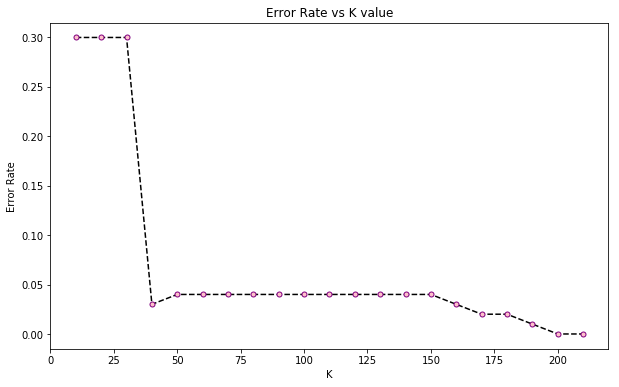

In [196]:
plt.figure(figsize=(10,6))
plt.plot(range(10,211,10),train1_error_rate, color='black',linestyle='dashed',marker='o',
         markerfacecolor='pink',markeredgecolor='purple',markersize=5)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')


####  Euclidean metric

##### Minkowski Distance:
##### Manhattan Distance 

Using the Manhattan distance(neighbors weighed uniformly), the least error rate of 0.11 is obtained with 6 neighbours.

In [197]:
#Test Error
error_rate_man = []
k_test_man = []
best_error_man = 100000
for k_man in range(1,197,5):
    
    knn = KNeighborsClassifier(n_neighbors=k_man,p=1,metric='manhattan')
    knn.fit(X_train,y_train.values.ravel())
    pred_i_man = knn.predict(X_test)
    error_rate_man.append(np.mean(y_test.values.ravel() != pred_i_man  ))
    if  best_error_man  >  min(error_rate_man):
        best_error_man = min(error_rate_man)
        best_k_man = k_man
print("\033[1m")
print ("Applying K-Nearest-Neighbors classifier algorithm with Manhattan distance metric(weighed by majority polling):")
print("\033[0m")
print ("Best error rate = {}". format(best_error_man))
print ("Number of neighbors = {}". format(best_k_man))


Applying K-Nearest-Neighbors classifier algorithm with Manhattan distance metric(weighed by majority polling):

Best error rate = 0.11
Number of neighbors = 6


Text(0, 0.5, 'Error Rate')

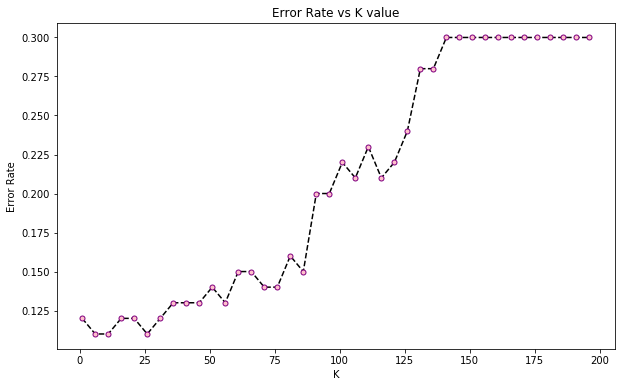

In [198]:
plt.figure(figsize=(10,6))
plt.plot(range(1,197,5),error_rate_man, color='black',linestyle='dashed',marker='o',
         markerfacecolor='pink',markeredgecolor='purple',markersize=5)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

##### with log10(p) 2 f0:1; 0:2; 0:3; : : : ; 1g. In this case, use the k∗ you found for the Manhattan distance

In [199]:

error_rate_log = []
k_test_log = []
pred_test_log = []
#error_k_array = []
best_error_log = 100000
accuracy_log= []
#q = 0.1
for q in np.arange(0.1,1.1,0.1):
    p_log=math.pow(10,q)
    knn = KNeighborsClassifier(n_neighbors=best_k_man, p=p_log,metric = 'minkowski')
    knn.fit(X_train,y_train.values.ravel())
    pred_i_log = knn.predict(X_test)
    pred_test_log.append(pred_i_log)
    error_rate_log.append(np.mean(pred_i_log != y_test.values.ravel()))
    if  best_error_log  >  min(error_rate_log) :
        best_error_log = min(error_rate_log)
        best_p_log = p_log
        best_q=q

print("\033[1m")
print ("Applying K-Nearest-Neighbors classifier algorithm with Manhattan distance metric(considering p such that log(p)base10 belongs to specified range, weighed by majority polling) :")
print("\033[0m")
print ("best error in Manhattan = {}". format(best_error_log))
print ("best log(p) in Manhattan = {}". format(best_q))


Applying K-Nearest-Neighbors classifier algorithm with Manhattan distance metric(considering p such that log(p)base10 belongs to specified range, weighed by majority polling) :

best error in Manhattan = 0.06
best log(p) in Manhattan = 0.6


Text(0, 0.5, 'Error Rate')

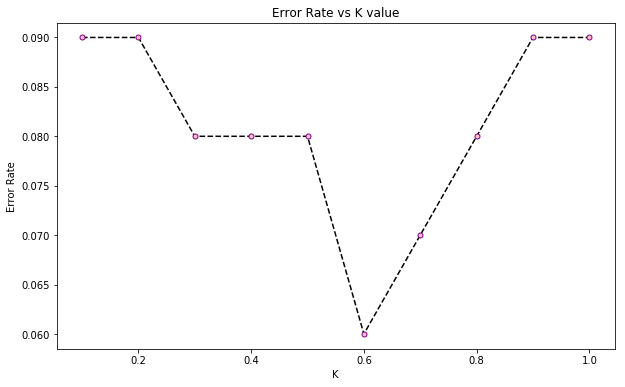

In [200]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(0.1,1.1,+0.1),error_rate_log, color='black',linestyle='dashed',marker='o',
         markerfacecolor='pink',markeredgecolor='purple',markersize=5)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

##### Chebyshev Distance with p -> infinity

In [201]:
#chebyshev distance
error_rate_che = []
k_test_che = []
pred_test_che = []
#error_k_array = []
best_error_che = 100000
accuracy_che= []
for q in range(1,196,5):
    
    knn = KNeighborsClassifier(n_neighbors=q,metric='chebyshev')
    knn.fit(X_train,y_train.values.ravel())
    pred_i_che = knn.predict(X_test)
    pred_test_che.append(pred_i_che)
    error_rate_che.append(np.mean(pred_i_che != y_test.values.ravel()))
    #best_error_che =np.mean(pred_i != y_test.values.ravel())
    #k_test_che.append(i)
    #accuracy.append(accuracy_score(y_test,pred_i_che))
    if  best_error_che  >  min(error_rate_che) :
        best_error_che = min(error_rate_che)
        best_k_che = q
        #best_accuracy_che = accuracy_score(y_test,pred_i_che)
        #print ("best_error_che {} \n".format(best_error_che))

print("\033[1m")
print ("Applying K-Nearest-Neighbors classifier algorithm with Chebyshev distance metric(weighed by majority polling) :")
print("\033[0m")
print ("best error rate in Chebyshev = {}". format(best_error_che))
print ("best k in Chebyshev = {}". format(best_k_che))
#print ("best k in Manhattan = {}". format(best_k_che))

#error_rate_che


Applying K-Nearest-Neighbors classifier algorithm with Chebyshev distance metric(weighed by majority polling) :

best error rate in Chebyshev = 0.08
best k in Chebyshev = 16


Text(0, 0.5, 'Error Rate')

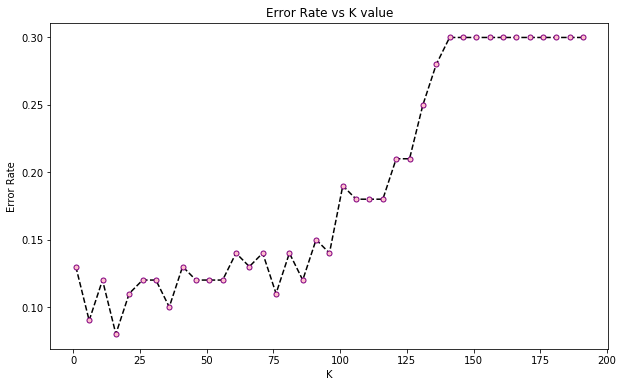

In [202]:
plt.figure(figsize=(10,6))
plt.plot(range(1,196,5),error_rate_che, color='black',linestyle='dashed',marker='o',
         markerfacecolor='pink',markeredgecolor='purple',markersize=5)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

##### Mahalanobis Distance.

In [203]:
#Mahalanobis distance
error_rate_mah = []
k_test_mah = []
pred_test_mah = []
#error_k_array = []
best_error_mah = 100000
accuracy_mah= []
for q in range(1,197,5):
    
    #covariance_xy = np.cov(X_train,y_train, rowvar=0)
    knn = KNeighborsClassifier(n_neighbors=q,metric='mahalanobis',metric_params={'V': np.cov(X_train)},algorithm='brute')
    knn.fit(X_train,y_train.values.ravel())
    pred_i_mah = knn.predict(X_test)
    pred_test_mah.append(pred_i_mah)
    error_rate_mah.append(np.mean(pred_i_mah != y_test.values.ravel()))
    #best_error_mah =np.mean(pred_i != y_test.values.ravel())
    #k_test_mah.append(i)
    #accuracy.append(accuracy_score(y_test,pred_i_mah))
    if  best_error_mah  >  min(error_rate_mah) :
        best_error_mah = min(error_rate_mah)
        best_k_mah = q
        #best_accuracy_mah = accuracy_score(y_test,pred_i_mah)
        #print ("best_error_mah {} \n".format(best_error_mah))

print("\033[1m")
print ("Applying K-Nearest-Neighbors classifier algorithm with Mahalanobis distance metric(weighed by majority polling) :")
print("\033[0m")
print ("best error in mahalanobis = {}". format(best_error_mah))
print ("best k in mahalanobis = {}". format(best_k_mah))
#print ("best k in mahalanobis = {}". format(best_k_mah))

#error_rate_mah


Applying K-Nearest-Neighbors classifier algorithm with Mahalanobis distance metric(weighed by majority polling) :

best error in mahalanobis = 0.16
best k in mahalanobis = 6


Text(0, 0.5, 'Error Rate')

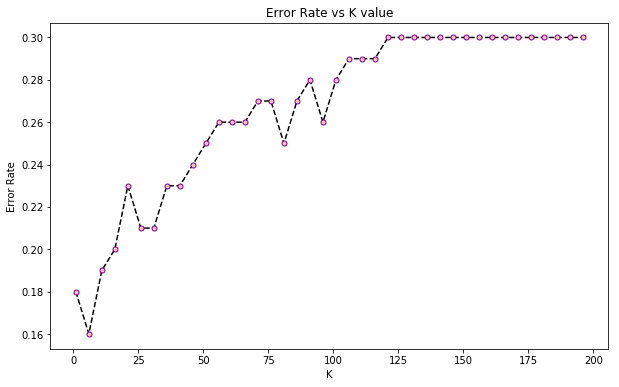

In [204]:
plt.figure(figsize=(10,6))
plt.plot(range(1,197,5),error_rate_mah, color='black',linestyle='dashed',marker='o',
         markerfacecolor='pink',markeredgecolor='purple',markersize=5)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

#### Weighted decision instead of majority polling and recomputing above

Weighted by distance : euclidean

In [205]:
#Test Error
error_rate_wt_euc = []
k_test_wt_euc = []
pred_test_wt_euc = []
accuracy_wt_euc = []
best_error_wt_euc = 100000
for i in range(1,196,5):
    
    knn = KNeighborsClassifier(n_neighbors=i, p=2,weights='distance',metric='euclidean')
    knn.fit(X_train,y_train.values.ravel())
    pred_i_wt_euc = knn.predict(X_test)
    pred_test_wt_euc.append(pred_i_wt_euc)
    error_rate_wt_euc.append(np.mean(pred_i_wt_euc != y_test.values.ravel()))
    if  best_error_wt_euc >  min(error_rate_wt_euc) :
        best_error_wt_euc = min(error_rate_wt_euc)
        best_k_wt_euc = i
print("\033[1m")
print ("Applying K-Nearest-Neighbors classifier algorithm with Euclidean distance metric(weighed by distance) :")
print("\033[0m")
print ("best error in euclidean:weighted decision = {}". format(best_error_wt_euc))
print ("best k in euclidean:weighted decision = {}". format(best_k_wt_euc))



Applying K-Nearest-Neighbors classifier algorithm with Euclidean distance metric(weighed by distance) :

best error in euclidean:weighted decision = 0.1
best k in euclidean:weighted decision = 6


Text(0, 0.5, 'Error Rate')

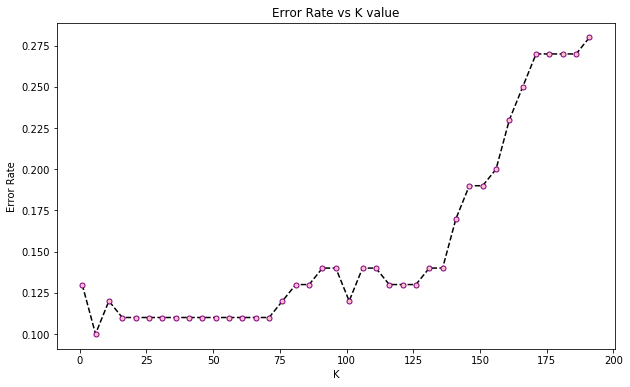

In [206]:
plt.figure(figsize=(10,6))
plt.plot(range(1,196,5),error_rate_wt_euc, color='black',linestyle='dashed',marker='o',
         markerfacecolor='pink',markeredgecolor='purple',markersize=5)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Weighted by distance : manhattan- Minkowski

In [207]:
#Test Error
error_rate_man_wt = []
k_test_man_wt = []
pred_test_man_wt = []
#error_k_array = []
best_error_man_wt = 100000
accuracy_man_wt= []
for k_man_wt in range(1,197,+5):
    
    knn = KNeighborsClassifier(n_neighbors=k_man_wt,p=1, weights='distance', metric = 'manhattan')
    knn.fit(X_train,y_train.values.ravel())
    pred_i_man_wt = knn.predict(X_test)
    pred_test_man_wt.append(pred_i_man_wt)
    error_rate_man_wt.append(np.mean(  y_test.values.ravel() != pred_i_man_wt))
    #best_error_man =np.mean(pred_i != y_test.values.ravel())
    #k_test_man.append(i)
    #accuracy.append(accuracy_score(y_test,pred_i_man))
    if  best_error_man_wt  >  min(error_rate_man_wt) :
        best_error_man_wt = min(error_rate_man_wt)
        best_k_man_wt = k_man_wt
        #best_accuracy_man_wt = accuracy_score(y_test,pred_i_man_wt)
        #print ("best_error_man {} \n".format(best_error_man_wt))
print("\033[1m")
print ("Applying K-Nearest-Neighbors classifier algorithm with Manhattan distance metric(weighed by distance) :")
print("\033[0m")
print ("best error in Manhattan = {}". format(best_error_man_wt))
print ("best k in Manhattan = {}". format(best_k_man_wt))
#error_rate_man_wt


Applying K-Nearest-Neighbors classifier algorithm with Manhattan distance metric(weighed by distance) :

best error in Manhattan = 0.1
best k in Manhattan = 26


Text(0, 0.5, 'Error Rate')

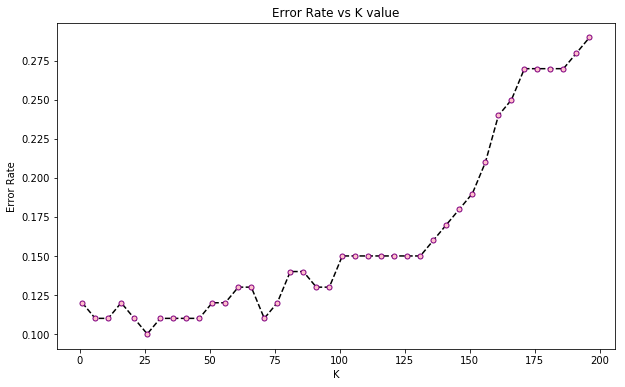

In [208]:
plt.figure(figsize=(10,6))
plt.plot(range(1,197,5),error_rate_man_wt, color='black',linestyle='dashed',marker='o',
         markerfacecolor='pink',markeredgecolor='purple',markersize=5)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Weighted by distance : chebyshev

In [209]:
#chebyshev distance
error_rate_che_wt = []
k_test_che_wt = []
pred_test_che_wt = []
#error_k_array = []
best_error_che_wt = 100000
accuracy_che_wt= []
for q in range(1,197,5):
    
    knn = KNeighborsClassifier(n_neighbors=q,metric='chebyshev', weights='distance')
    knn.fit(X_train,y_train.values.ravel())
    pred_i_che_wt = knn.predict(X_test)
    pred_test_che_wt.append(pred_i_che_wt)
    error_rate_che_wt.append(np.mean(y_test.values.ravel()!= pred_i_che_wt  ))
    #best_error_che =np.mean(pred_i != y_test.values.ravel())
    #k_test_che.append(i)
    #accuracy.append(accuracy_score(y_test,pred_i_che))
    if  best_error_che_wt  >  min(error_rate_che_wt) :
        best_error_che_wt = min(error_rate_che_wt)
        best_k_che_wt = q
        #best_accuracy_che = accuracy_score(y_test,pred_i_che)
        #print ("best_error_che {} \n".format(best_error_che))
print("\033[1m")
print ("Applying K-Nearest-Neighbors classifier algorithm with Chebyshev distance metric(weighed by distance) :")
print("\033[0m")
print ("best error in Chebyshev = {}". format(best_error_che_wt))
print ("best k in Chebyshev = {}". format(best_k_che_wt))
#print ("best k in Manhattan = {}". format(best_k_che))

#error_rate_che_wt


Applying K-Nearest-Neighbors classifier algorithm with Chebyshev distance metric(weighed by distance) :

best error in Chebyshev = 0.11
best k in Chebyshev = 16


Text(0, 0.5, 'Error Rate')

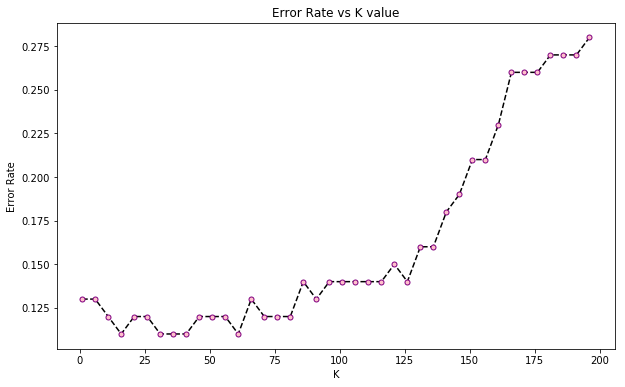

In [210]:
plt.figure(figsize=(10,6))
plt.plot(range(1,197,5),error_rate_che_wt, color='black',linestyle='dashed',marker='o',
         markerfacecolor='pink',markeredgecolor='purple',markersize=5)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

#### Observation : Lowest training error rate achieved

In [211]:
Metric =  ['Euclidean', 'Manhattan','Chebyshev','Mahalanobis']
Bst_K_by_poll = [4,6,16,6]
Bst_Er_by_poll = [0.06,0.11,0.08,0.16]
Bst_K_by_dist = [6,26 ,16,' ']
Bst_Er_by_dist = [0.1,0.1,0.11,' ']
col_name = ['Metric', 'K(polling)', 'Error(polling)', 'K(distance)', 'Error(distance)']
consolidated_data = [col_name] + list(zip(Metric, Bst_K_by_poll, Bst_Er_by_poll, Bst_K_by_dist, Bst_Er_by_dist))
print("\033[1m")
print ("Summary of Best K and Error rates calculated across all metrices , weighted by distance/polling :")
print("\033[0m")
for i,d in enumerate(consolidated_data):
    separator = '|'.join(str(x).ljust(12) for x in d)
    print(separator)
    if i == 0:
        print('-' * len(separator))
        
print("\nLearning Curve : Best K = 6, lowest Error Rate = 0.0 obtained with N=210")
print("\nManhattan distance considering p such that log(p)base(10) : Best log(p) = 0.6 and lowest error Rate=  0.06")
print("\n Euclidean distance tested using training data : Best K =1 and lowest error rate = 0.0")


Summary of Best K and Error rates calculated across all metrices , weighted by distance/polling :

Metric      |K(polling)  |Error(polling)|K(distance) |Error(distance)
---------------------------------------------------------------------
Euclidean   |4           |0.06        |6           |0.1         
Manhattan   |6           |0.11        |26          |0.1         
Chebyshev   |16          |0.08        |16          |0.11        
Mahalanobis |6           |0.16        |            |            

Learning Curve : Best K = 6, lowest Error Rate = 0.0 obtained with N=210

Manhattan distance considering p such that log(p)base(10) : Best log(p) = 0.6 and lowest error Rate=  0.06

 Euclidean distance tested using training data : Best K =1 and lowest error rate = 0.0


##### Observations : 
lowest training error(0) is obtained for Euclidean Distance tested on training data, learning curve measured for euclidean distance with N=210 and K=6.
The next least error rate (0.06)is observed for Euclidean distance with test data, weighted by Majority polling, (K=4)
